### Deep Learning

딥러닝은 모형들의 output이 다시 input으로 들어가서 학습을 이어나가는 Layer 구조를 가지는 모형입니다. 모형의 특징을 결정하는데는 다음과 같은 요소들이 필요하게 됩니다. 앞으로는 밑의 개념들을 하나씩 정리해 보려고합니다.

- 모델 Building
    - Connectivity patterns
    - Nonlinearity Modules
    - Loss function
- 모델 학습
    - Optimization
    - Hyper Parameters

### Connectivity Pattern

딥러닝은 여러 레이어를 쌓아나가는 구조입니다. 뉴런은 각 레이어에 있으며, 레이어들간의 연결관계에 따라서 패턴이 나눠집니다.
- Fully-Conntected
- Convolutional
- Dilated
- Recurrent
- Skip / Residual
- Random

이 Colab문서에서는 간단한 Connectivity Pattern을 정리하고자 합니다.

### 1. FC Layer

뉴럴넷의 가장 간단한 아키텍쳐를 세팅해보려고 합니다. 저희에게 필요한 것은 레이어의 갯수와 뉴런의 갯수 그리고, 각 layer들의 연결 패턴을 고려해야합니다. 이번 케이스에서는 Input, hidden, output layer를 각각 하나씩 가지고 있는 모듈을 만들어 보려고합니다. connectivity pattern은 fully connected 로 하겠습니다. 

- Layer number
- Neuron number
- connectivity pattern

In [3]:
layer_dims = [5,4,3,1]

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    cache = Z 
    return A, cache

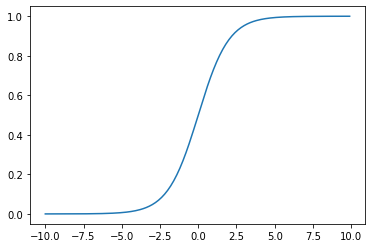

In [5]:
Z = np.arange(-10, 10, 0.1)
A, cache = sigmoid(Z)
plt.plot(Z, A)
plt.show()

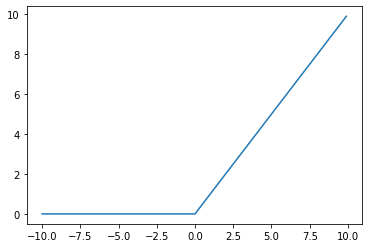

In [6]:
Z = np.arange(-10, 10, 0.1)
A, cache = relu(Z)
plt.plot(Z, A)
plt.show()

In [7]:
for l in range(1, 4):
    print(l)

1
2
3


In [8]:
def initialize_parameters_deep(layer_dims):
    # dictionary 객체 생성
    parameters = {}
    # 총 layer들의 길이를 계산
    L = len(layer_dims)
    # 레이어들을 돌면서, 레이어들 간의 weight와 bias의 초기값의 난수 생성
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = np.random.randn(layer_dims[l], layer_dims[l+1]) / np.sqrt(layer_dims[l+1]) #*0.01
        parameters['b' + str(l+1)] = np.zeros((layer_dims[l+1], ))
        
    return parameters

In [9]:
parameters = initialize_parameters_deep(layer_dims)
parameters

{'W1': array([[-0.24720638,  0.50885597, -0.17014561, -0.50386214],
        [ 0.35165572,  0.74924276, -0.04874178,  0.30375006],
        [-0.08024119, -0.24656575, -0.22196307,  0.72332653],
        [ 0.09263592, -0.26460486,  0.38760777, -0.90659459],
        [-0.33204089, -0.40740119, -0.65394252,  0.21167938]]),
 'b1': array([0., 0., 0., 0.]),
 'W2': array([[-0.66769703, -0.48021416, -0.00940124],
        [-0.37073708, -1.20498958, -1.06410805],
        [ 0.67547258, -0.9401677 , -0.24577967],
        [-0.57806856, -0.40532887, -0.53841754]]),
 'b2': array([0., 0., 0.]),
 'W3': array([[ 0.83704198],
        [-0.37045089],
        [ 0.33667102]]),
 'b3': array([0.])}

In [10]:
def linear_forward(A, W, b):
    # A에 W를 내적하게 됩니다. 그후에는 b를 더해줍니다.
    Z = A.dot(W) + b  # (4,5)(5,4)+(4,) => (4,4)

    # 계산단계에서 사용한 값을 cache에 저장해둡니다.
    cache = (A, W, b)
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    # Activation function의 종류에 따라서 값을 나누어 줍니다.
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    # linear 연산과 activation 연산을 cache에 저장해둡니다.
    cache = (linear_cache, activation_cache)
    return A, cache

In [11]:
def L_model_forward(X, parameters):
    # cache 들의 list입니다.
    caches = []
    A = X
    # weight와 bias가 저장되어 있기 때문에 //2 를 해주어야 layer의 사이즈가 됩니다.
    L = len(parameters) // 2 
    
    # hidden layersms relu를 통과
    for l in range(0, L-1):
        print(l)
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l+1)], parameters['b' + str(l+1)], activation = "relu")
        caches.append(cache)
    
    # output layer는 sigmoid를 통과하게 한다
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    return AL, caches

In [12]:
X = np.random.randn(4,5)
Y = np.array([0, 1, 1, 0])
AL, caches = L_model_forward(X, parameters)

0
1


In [13]:
print(Y.reshape(-1,1))
print(AL)

[[0]
 [1]
 [1]
 [0]]
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


### 4. Cost Function

우리는 신경망을 통과한 $\hat{y}$값을 찾을 수 있었습니다. 하지만 우리의 실제 y 레이블과는 다른 값일 가능성이 매우 크기 떄문에 이를 반영하여 학습을 시켜야합니다. Cost function은 여러가지 종류가 있습니다만, 이번의 경우에는 cross-entropy 함수를 사용하려고합니다. 이후에 Cost function에 대해서도 정리해보도록 하겠습니다.

$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$


__Arguments__

AL : 뉴럴넷을 통과해서 나오게된 $\hat{y}$ 입니다. shape (number of examples,1)
Y -- 실제 "label" vector 입니다. (for example: containing 0 if non-cat, 1 if cat), shape ( number of examples, 1)

__Returns__

cost : cross-entropy cost

    

In [14]:
def compute_cost(AL, Y):
    m = Y.shape[0]
    cost = (-1.0/m)*np.sum(np.multiply(Y,np.log(AL)) + np.multiply(1-Y, np.log(1-AL)))
    cost = np.squeeze(cost)
    return cost

In [15]:
cost = compute_cost(AL, Y)
print("cost = " , cost)

cost =  2.772588722239781


__Backpropagation Process__

Backpropagation은 다음과 같은 process를 가지게 됩니다.

- LINEAR backward
- LINEAR -> ACTIVATION backward
- Layer -> Layer backward

### Linear backward

Linear 한 영역에서 backward 과정은 다음과 같은 인자를 받게 됩니다.

__Arguments__

dZ : Z의 변화량입니다. linear 부분에서 ouput이 cost function 에 대한 gradient를 나타냅니다.

cache : forward과정에서 필요한 값을 받아옵니다. tuple 형태의 (A_prev, W, b) 값들을 받아옵니다.

__Returns__

dA_prev : Linear 구간의 input으로 들어왔었던, 지난 레이어의 activation 을 통과한 A가 cost function에 대한 변화량입니다.

dW : Linear 구간의 weight의 cost function에 대한 변화량 입니다.

db : Linear 구간의 bias의 cost function 에 대한 변화량 입니다.


### Linear-Activation backward

Activation function $g(.)$ 에 대해서 Linear-activate backward는 다음과 같이 계산됩니다.

$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$.  

__Arguments__

dA : 현재 layer의 gradient값이 인자로 들어옵니다.

cache : forward pass에서 계산했던 linear(Z) 부분과 activation(A) 부분의 계산값들을 받습니다.

__Returns__

dA_prev : Linear 구간의 input으로 들어왔었던, 지난 레이어의 activation 을 통과한 A가 cost function에 대한 변화량입니다.

dW : Linear 구간의 weight의 cost function에 대한 변화량 입니다.

db : Linear 구간의 bias의 cost function 에 대한 변화량 입니다.

$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$

$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$

$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$


In [16]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

In [17]:
Z = np.array([[1,2,3,-1,-2,-3]])
dA = np.array([[1,-2,3,1,-2,3]])
dZ = relu_backward(dA, Z)
print(dZ)

[[ 1 -2  3  0  0  0]]


In [18]:
def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

In [19]:
Z = np.array([[0,1,2,3,4,5]])
dA = np.array([[10,10,10,10,10,10]])
dZ = sigmoid_backward(dA, Z)
print(dZ)

[[2.5        1.96611933 1.04993585 0.4517666  0.17662706 0.06648057]]


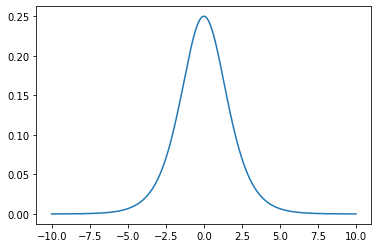

In [20]:
Z = np.linspace(-10,10,1000)
dA = np.ones((1000,))
dZ = sigmoid_backward(dA, Z)
plt.plot(Z, dZ)
plt.show()

In [21]:
# X.shape = (4,5)
# W.shape = (5,4)
# b.shape = (4,)
# A = np.dot(X,W)+b  (4,5)(5,4)+(4,) => (4,4)

# dW.shape = np.dot(A_prev.T,dZ)/m  (5,4)(4,4) => (5,4)
# db = np.sum(dZ, axis=0)/m  (4,4) => (4,)
# dA_prev = np.dot(dZ, W.T)/m (4,4)(4,5) => (4,5)

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[0]
    
    dW = np.dot(A_prev.T,dZ)/m
    db = np.sum(dZ, axis=0)/m
    dA_prev = np.dot(dZ, W.T)/m
    
    return dA_prev, dW, db

In [22]:
X = np.arange(20,).reshape(4,5)
W = np.ones((5,4))
b = np.zeros((4,))

cache = X, W, b
dZ = np.arange(16,).reshape(4,4)
dA_prev, dW, db = linear_backward(dZ, cache)
print(dW.shape, dW)
print(db.shape, db)
print(dA_prev.shape, dA_prev)

(5, 4) [[ 70.   77.5  85.   92.5]
 [ 76.   84.5  93.  101.5]
 [ 82.   91.5 101.  110.5]
 [ 88.   98.5 109.  119.5]
 [ 94.  105.5 117.  128.5]]
(4,) [6. 7. 8. 9.]
(4, 5) [[ 1.5  1.5  1.5  1.5  1.5]
 [ 5.5  5.5  5.5  5.5  5.5]
 [ 9.5  9.5  9.5  9.5  9.5]
 [13.5 13.5 13.5 13.5 13.5]]


In [23]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db =  linear_backward(dZ, linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

In [24]:
def L_model_backward(AL, Y, caches):
    grads = {} # 빈 dictionary 호출
    L = len(caches) # 레이어의 갯수를 caches로 부터 받아옵니다.
    m = AL.shape[0]
    Y = Y.reshape(AL.shape) # Shape을 AL과 동일하게 해줍니다.
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y,AL)- np.divide(1-Y, 1-AL))
    # caches index를 잡아둡니다.
    current_cache = caches[L-1] 
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation="sigmoid")
    
    for l in reversed(range(L-1)):
        # indexing입니다.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)], current_cache, activation="relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

In [25]:
grads = L_model_backward(AL, Y, caches)
grads

{'dA2': array([[ 0.10463025, -0.04630636,  0.04208388],
        [-0.10463025,  0.04630636, -0.04208388],
        [-0.10463025,  0.04630636, -0.04208388],
        [ 0.10463025, -0.04630636,  0.04208388]]), 'dW3': array([[0.],
        [0.],
        [0.]]), 'db3': array([0.]), 'dA1': array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]), 'dW2': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]), 'db2': array([0., 0., 0.]), 'dA0': array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]), 'dW1': array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]), 'db1': array([0., 0., 0., 0.])}

### 6. Update parameter

파라미터를 업데이트 하는 규칙은 생각보다 간편합니다. Learning rate인 $\alpha$ 에 Gradient를 곱해서 현재의 parameter에 빼주면 새로운 parameter가 됩니다.

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

__Arguments__

parameters : 파라미터들이 담겨져 있는 parameter dictionary입니다.
grads : Gradient들이 담겨있는 입니다

__Returns__

parameters : 업데이트되어있는 파라미터들이 담긴 dictionary입니다
- parameters["W" + str(l)] = ... 
- parameters["b" + str(l)] = ...

In [26]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # 레이어의 갯수입니다.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW"+str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db"+str(l+1)]
    return parameters

In [27]:
parameters = update_parameters(parameters, grads, 0.05)
parameters

{'W1': array([[-0.24720638,  0.50885597, -0.17014561, -0.50386214],
        [ 0.35165572,  0.74924276, -0.04874178,  0.30375006],
        [-0.08024119, -0.24656575, -0.22196307,  0.72332653],
        [ 0.09263592, -0.26460486,  0.38760777, -0.90659459],
        [-0.33204089, -0.40740119, -0.65394252,  0.21167938]]),
 'b1': array([0., 0., 0., 0.]),
 'W2': array([[-0.66769703, -0.48021416, -0.00940124],
        [-0.37073708, -1.20498958, -1.06410805],
        [ 0.67547258, -0.9401677 , -0.24577967],
        [-0.57806856, -0.40532887, -0.53841754]]),
 'b2': array([0., 0., 0.]),
 'W3': array([[ 0.83704198],
        [-0.37045089],
        [ 0.33667102]]),
 'b3': array([0.])}

### CNN 구조

CNN 은 이미지의 __특징을 추출__ 하는 부분과 __클래스를 분류__ 하는 부분으로 나눌 수 있습니다. 
<br>

__특징 추출__ : Convolution Layer,Pooling Layer

입력 데이터를 필터가 순회하며 합성곱을 계산하고, 그 계산 결과를 이용하여 Feature map을 만듭니다. Feature map는 sub-sampled 를 통해서 차원을 줄여주는 효과를 가지게 됩니다. Convolution Layer는 Filter 크기, Stride, Padding 적용여부, Max Pooling의 크기에 따라서 출력 데이터의 Shape이 결정됩니다. 

- Convolution Layer : 입력데이터에 필터(Filter or Weight)를 적용 후 활성함수를 반영하는 요소입니다.
- Pooling Layer(Subsampling) : spatial 차원의 다운샘플링을 책임집니다.

__클래스 분류__ : Fully Connected Layer

### Convolve Window

이번에는 Filter를 이동시키며 convolution 연산하는 과정을 구해보려고 합니다. input의 volume을 받아서(3차원), 모든 position의 input에 filter를 적용해보고자합니다. Convolution 연산은 element wise multiplication으로 이루어집니다.
    
__Argument__

- a_slice_prev : Filter가 적용될 Input입니다. (f, f, n_C_prev)
- W : Filter의 사이즈입니다. (f, f, n_C_prev)
- b : Bais입니다. - matrix of shape (1, 1, 1)
    
__Returns__

- Z : Convolution 연산의 결과로 나오는 값입니다.

In [28]:
def zero_pad(X,pad):
    X_pad = np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)),'constant',constant_values=0)
    return X_pad

In [35]:
x = np.arange(1,10).reshape(1,3,3,1)
x_pad = zero_pad(x, 2)
print(x.shape, x_pad.shape)
print(x.reshape(3,3))
print(x_pad.reshape(3+2*2,3+2*2))

(1, 3, 3, 1) (1, 7, 7, 1)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 7 8 9 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [36]:
x = np.arange(1,10).reshape(1,3,3,1)
x_pad = zero_pad(x, 0)
print(x.shape, x_pad.shape)
print(x.reshape(3,3))
print(x_pad.reshape(3,3))

(1, 3, 3, 1) (1, 3, 3, 1)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [30]:
x = np.random.randn(4,3,3,2)
x_pad = zero_pad(x, 1)
print(x.shape, x_pad.shape)

(4, 3, 3, 2) (4, 5, 5, 2)


In [31]:
def conv_single_step(a_slice_prev, W, b):
    # Element-wise product
    s = a_slice_prev * W
    # 채널을 기반으로 모두 더해줍니다.
    Z = np.sum(s)
    # Bias b를 더해줍니다.
    Z = Z + np.float64(b)
    return Z

In [32]:
x = np.arange(1,5)
W = np.array([2,2,3,3])
b = 10
Z = conv_single_step(x,W,b)   # 1*2+2*2+3*3+4*3 + 10
print(x)
print(Z)

[1 2 3 4]
37.0


In [33]:
x = np.arange(1,5).reshape(2,2)
W = np.array([[2,2],
              [3,3]])
b = 10
Z = conv_single_step(x,W,b)   # 1*2+2*2+3*3+4*3 + 10
print(x)
print(Z)

[[1 2]
 [3 4]]
37.0


### 3. Convolutional Neural Networks - Forward pass

Forward pass에서는 다양한 필터를 통해서, 구현을 위해 2D input의 horizental과 vertial index를 계산하면서 filter를 적용해보려고합니다. stack이 되는 output을 계산해 보려고합니다.

Convolution의 output shape을 결정하는 식은 다음과 같습니다.

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 
$$

$$n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$

$$n_C = \text{number of filters used in the convolution}$$


__Arguments__

- A_prev : Input으로 들어가는 Matrix입니다. 데이터의 batch m, Hight, Width, Channel이 포함되어 있습니다. (m, n_H_prev, n_W_prev, n_C_prev)
- W : Weights, Filter입니다. (f, f, n_C_prev, n_C)
- b : Biases (1, 1, 1, n_C)
- hparameters : "stride" 와 "pad"를 결정하는 python dictionary입니다.

__Returns__

- Z : conv output입니다. (m, n_H, n_W, n_C)
- cache : conv_backward() 에 도움을 줄 cache입니다.

In [51]:
def conv_forward(A_prev, W, b, hparameters):
    # Input의 shpae을 정의합니다.
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    # filter의 shape을 정의합니다.
    (f,f,n_C_prev,n_C) = W.shape
    # input dictionary에서 받을 value 값입니다.
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Conv의 output volumn을 정의해줍니다
    n_H = int(((n_H_prev - f + (2*pad)) / stride)+1)
    n_W = int(((n_W_prev - f + (2*pad)) / stride)+1)
    
    # output volumn을 initialize해줍시다
    Z = np.zeros((m, n_H, n_W, n_C))
    # print(Z.shape)
    
    # Padding을 설정해줍니다.
    A_prev_pad = zero_pad(A_prev,pad)
    
    for i in range(m): #batch에 있는 traindata를 조회
        a_prev_pad = A_prev_pad[i]
        for h in range(n_H): #hight를 돌고
            for w in range(n_W): #width를 돌고
                for c in range(n_C): #Channel을 돌면서
                    #input의 slice를 해줍시다
                    vert_start = h*stride
                    vert_end = vert_start+f
                    horiz_start = w*stride
                    horiz_end = horiz_start+f
                    
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end,:]
                    Z[i,h,w,c]=conv_single_step(a_slice_prev,W[...,c],b[...,c])
                    # print(i,h,w,c, Z[i,h,w,c])
    assert(Z.shape == (m,n_H,n_W,n_C))
    cache = (A_prev,W,b,hparameters)
    
    return Z, cache

In [50]:
A_prev = np.arange(16).reshape(1,4,4,1)
print(A_prev.reshape(4,4))
W = np.ones((2,2,1,1))
print(W.reshape(2,2))
b = np.zeros((1,1,1,1))
hparameters = {"pad" : 0,
               "stride": 1}
Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print(Z.reshape(3,3))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[1. 1.]
 [1. 1.]]
0 0 0 0 10.0
0 0 1 0 14.0
0 0 2 0 18.0
0 1 0 0 26.0
0 1 1 0 30.0
0 1 2 0 34.0
0 2 0 0 42.0
0 2 1 0 46.0
0 2 2 0 50.0
[[10. 14. 18.]
 [26. 30. 34.]
 [42. 46. 50.]]


In [54]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}
Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print(Z.shape) #   (10,4,4,8)   ,  n_H = int(((n_H_prev - f + (2*pad)) / stride)+1) => int(((4 - 2 + (2*2)) / 2)+1)

(10, 4, 4, 8)


In [55]:
print("Z's mean =", np.mean(Z))

Z's mean = 0.048995203528855794


### 4. Forward Pooling

Activation function은 잠시 넘어가고 이제 MAX-POOL과 AVG-POOL을 구현해 봅시다.

패딩이 없다고 가정하고 Pooling을 구현해보려고합니다. 다음과 같은 공식을 기반으로 구현이 이루어집니다.

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$
$$ n_C = n_{C_{prev}}$$

__Arguments__
- A_prev : Input데이터입니다. 일반적으로 Convolution layer의 결과값이 됩니다. (m, n_H_prev, n_W_prev, n_C_prev)
- hparameters : "f" 와 "stride"가 담긴 dictionary입니다.
- mode : "max" or "average"를 결정하는 인자입니다.

__Returns__
- A : pool layer의 output입니다. (m, n_H, n_W, n_C)
- cache : Backward pass를 계산히기 위해 저장해두는 캐시입니다.

In [56]:
def pool_forward(A_prev, hparameters, mode="max"):
    # input의 shape을 받아옵니다
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    # filter size와 stride size를 받아옵니다.
    f = hparameters["f"]
    stride = hparameters["stride"]
    # ouput dimension을 잡아줍시다
    n_H = int(1+(n_H_prev-f)/stride)
    n_W = int(1+(n_W_prev-f)/stride)
    n_C = n_C_prev
    
    A = np.zeros((m, n_H, n_W, n_C))
    
    for i in range(m):
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):
                    vert_start = h*stride
                    vert_end = vert_start + f
                    horiz_start = w*stride
                    horiz_end = horiz_start + f
                    
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    if mode == "max":
                        A[i,h,w,c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i,h,w,c] = np.mean(a_prev_slice)
                        
    cache = (A_prev, hparameters)
    assert(A.shape ==(m,n_H,n_W,n_C))
    
    return A, cache

In [60]:
A_prev = np.arange(16).reshape(1,4,4,1)
print(A_prev.reshape(4,4))
hparameters = {"stride" : 2, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
print(A.reshape(2,2))
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print(A.reshape(2,2))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 5.  7.]
 [13. 15.]]
[[ 2.5  4.5]
 [10.5 12.5]]


In [62]:
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride" : 2, "f": 3}
A, cache = pool_forward(A_prev, hparameters)
print(A.shape)  # (2,1,1,3)  , n_H = int(1+(n_H_prev-f)/stride) => n_H = int(1+(4-3)/2)
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print(A.shape)

(2, 1, 1, 3)
(2, 1, 1, 3)


In [63]:
np.random.seed(1)
A_prev = np.random.randn(2, 24, 24, 3)
hparameters = {"stride" : 3, "f": 3}
A, cache = pool_forward(A_prev, hparameters)
print(A.shape)  # (2,8,8,3)  , n_H = int(1+(n_H_prev-f)/stride) => n_H = int(1+(24-3)/3)

(2, 8, 8, 3)


RNN Forward Pass

실제 RNN 모델의 경우에는 단일한 time-step이 적용되는 경우는 거의 없습니다. 이번에는 RNN cell이 10개가 붙어있다고 생각해 봅시다.

__Arguments__<br>
- x -- 모든 time-step의 input 데이터입니다. shape은 (n_x, m, T_x)결정됩니다. 
- a0 -- 초기 hidden state입니다. hidden state의 갯수와, 데이터의 갯수로 shape이 결정됩니다.(n_a, m) 
- parameters -- python dictionary로 다음과 같은 정보가들어옵니다.
    - Waa -- hidden state에 대한 Weight matrix입니다.(n_a, n_a)
    - Wax -- input에 대한 Weight matrix입니다.(n_a, n_x)
    - Wya -- hidden state에서 output으로 가는 Weight matrix 입니다. (n_y, n_a)
    - ba -- hidden state에 대한 Bias입니다. (n_a, 1)
    - by -- output에 대한 Bias입니다 (n_y, 1)

__Returns__<br>
- a -- 모든 time step에 대한 hidden state 백터입니다. (n_a, m, T_x)
- y_pred -- 예측된 Output입니다. (n_y, m, T_x)
- caches -- Backprop에 필요한 Caches입니다. (list of caches, x)

__Task__<br>
1. $a$인 hidden state vector의 공간을 zero vector로 만들어 줍니다.
2. $a_0$ (initial hidden state)을 초기화 합니다.
3. Time step을 기반으로 for loop를 통해서 RNN cell 을 돌려줍니다. :
    - $a$ ($t^{th}$ position)를 계산합니다. 즉 이전 스탭에서 현재 스탭으로 업데이트하는 것이죠.
    - $a$ ($t^{th}$ position)를 캐시에 저장해 줍니다.
    - $y_pred$를 다시 업데이트 해줍니다.
    - 캐시를 저장합니다.
4. 마지막 step의 $a$, $y$와 caches를 저장해줍니다.

In [64]:
import numpy as np

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

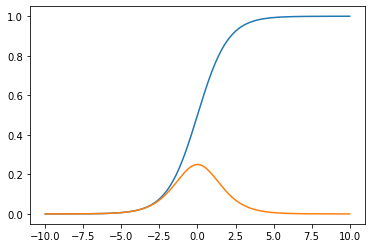

In [67]:
import matplotlib.pyplot as plt

x = np.linspace(-10,10,1000)
y = sigmoid(x)
plt.plot(x,y)
plt.plot(x,y*(1-y))
plt.show()

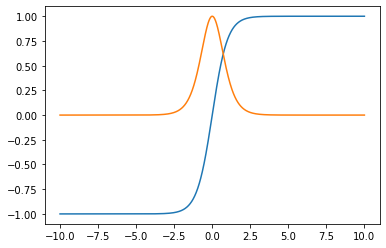

In [68]:
x = np.linspace(-10,10,1000)
y = np.tanh(x)
plt.plot(x,y)
plt.plot(x,1-y**2)
plt.show()

In [74]:
def rnn_cell_forward(xt, a_prev, parameters):
    
    # parameter의 dict에서 데이터를 호출합니다.
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]
    
    # 1. hidden state를 구현해봅시다.
    a_next = np.tanh(np.dot(Wax, xt) + np.dot(Waa, a_prev) + ba)   # (3,4)(4,1) + (3,3)(3,1) + (3,1) => (3,1)
    # 2. Predict Output를 구현해봅니다.
    yt_pred = softmax(np.dot(Wya, a_next)+by)                      # (5,3)(3,1)+(5,1) => (5,1)
    # 3. Cache에 저장합시다.
    cache = (a_next, a_prev, xt, parameters)
    
    return a_next, yt_pred, cache

In [81]:
x = np.arange(-2,2).reshape(4,1)
print(x)
Wax = np.array([[1., 1., 1., 1.],
                [1., 2., 1., 3.],
                [-1., 1., -1., 1.]])
print(Wax)

print(np.dot(Wax, x))

a0 = np.arange(-1,2).reshape(3,1)
print(a0)
Waa = np.array([[1., 2., 1.],
                [1., 2., 2.],
                [1., -1.,1.]])
print(Waa)

print(np.dot(Waa, a0))



Wya =np.array([[1., 2., 1.],
                [1., -2., 2.],
                [-1., 1.,1.],
                [1., 2., 2.],
                [1., 1., 3.]])


ba = np.ones((3,1))
by = np.ones((5,1))
parameters = {"Waa": Waa, "Wax": Wax, "Wya": Wya, "ba": ba, "by": by}

print(np.dot(Wax, x) + np.dot(Waa, a0) + ba)

a_next, yt_pred, cache = rnn_cell_forward(x, a0, parameters)
print(a_next)
print(yt_pred)

[[-2]
 [-1]
 [ 0]
 [ 1]]
[[ 1.  1.  1.  1.]
 [ 1.  2.  1.  3.]
 [-1.  1. -1.  1.]]
[[-2.]
 [-1.]
 [ 2.]]
[[-1]
 [ 0]
 [ 1]]
[[ 1.  2.  1.]
 [ 1.  2.  2.]
 [ 1. -1.  1.]]
[[0.]
 [1.]
 [0.]]
[[-1.]
 [ 1.]
 [ 3.]]
[[-0.76159416]
 [ 0.76159416]
 [ 0.99505475]]
[[0.10648177]
 [0.01368981]
 [0.22805069]
 [0.2880196 ]
 [0.36375812]]


In [83]:
def rnn_forward(x, a0, parameters):
    # caches라는 cache를 저장할 list를 선언합니다.
    caches = []
    
    # Dimension을 맞추기 위해 input sequence 가준으로 unpacking 해줍니다.
    n_x, m, T_x = x.shape   # (3,10,4)
    n_y, n_a = parameters["Wya"].shape
    
    # a와 y를 초기화 합니다.
    a = np.zeros((n_a,m,T_x))
    y_pred = np.zeros((n_y,m,T_x))
    
    # a_next를 초기화 합니다.
    a_next = a0
    
    # time step을 돌면서 rnn cell을 작동 시킵니다.
    for t in range(T_x):
        # 1. hidden step을 계산해 줍니다.
        a_next, yt_pred, cache = rnn_cell_forward(x[:,:,t], a_next, parameters)  # (3,10,4) => (3,10)
                                                                                 # a_next = np.tanh(np.dot(Wax, xt) + np.dot(Waa, a_prev) + ba)
                                                                                 #  (5,3)(3,10) + (5,5)(5,10) + (5,1) => (5,10)
        # 2. 새로운 hidden step을 a에 반영해 줍니다.
        a[:,:,t] = a_next
        # y의 값 역시 업데이트 해줍니다.
        y_pred[:,:,t] = yt_pred                                                  # (2,5)(5,10)+(2,1) => (2,10)
        
        # 결과값을 저장해 줍니다.
        caches.append(cache)
        
    caches = (caches, x)
    return a, y_pred, caches

In [84]:
np.random.seed(1)
x = np.random.randn(3,10,4)
a0 = np.random.randn(5,10)
Waa = np.random.randn(5,5)
Wax = np.random.randn(5,3)
Wya = np.random.randn(2,5)
ba = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Waa": Waa, "Wax": Wax, "Wya": Wya, "ba": ba, "by": by}

a, y_pred, caches = rnn_forward(x, a0, parameters)

In [85]:
print(a.shape)

(5, 10, 4)


In [86]:
print(y_pred.shape)

(2, 10, 4)
